# Motivação

Nesta aula, vamos explorar conceitos fundamentais de aprendizado de máquina, começando com um problema de classificação. Utilizaremos dois modelos AdaBoost para entender a diferença de performance entre um modelo mais simples e outro mais complexo, discutindo fenômenos como overfitting e a importância da calibração. Em seguida, estudaremos fenômenos curiosos em alta dimensão, como o comportamento do volume de uma esfera de raio unitário à medida que a dimensão aumenta.

## Classificando coisas

Neste código, vamos comparar dois modelos AdaBoost para um problema de classificação. O Modelo 1 usará árvores de decisão rasas, enquanto o Modelo 2 terá árvores mais profundas, com o objetivo de observar o impacto disso no desempenho.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Gerar dataset sintético
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# 2. Separação dos dados em treino (60%), calibração (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_calibration, X_test, y_calibration, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Treinamento dos modelos AdaBoost

# Modelo 1: AdaBoost com árvores de decisão rasas (default)
adaboost_default = AdaBoostClassifier(n_estimators = 50, random_state=42)
adaboost_default.fit(X_train, y_train)

# Modelo 2: AdaBoost com árvores de decisão mais profundas (max_depth=10)
adaboost_deep = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),  # Árvores mais profundas
    random_state=42,
    n_estimators = 50,
)
adaboost_deep.fit(X_train, y_train)

# 4. Avaliação dos modelos no conjunto de calibração

# Avaliação do Modelo 1 (AdaBoost padrão)
y_calibration_pred_default = adaboost_default.predict(X_calibration)
acc_default_calibration = (y_calibration == y_calibration_pred_default).mean()

# Avaliação do Modelo 2 (AdaBoost com árvores profundas)
y_calibration_pred_deep = adaboost_deep.predict(X_calibration)
acc_deep_calibration = (y_calibration == y_calibration_pred_deep).mean()

# 5. Avaliação dos modelos no conjunto de treino e teste

# Para o Modelo 1 (AdaBoost padrão)
y_train_pred_default = adaboost_default.predict(X_train)
y_test_pred_default = adaboost_default.predict(X_test)
acc_default_train = (y_train == y_train_pred_default).mean()
acc_default_test = (y_test == y_test_pred_default).mean()

# Para o Modelo 2 (AdaBoost com árvores profundas)
y_train_pred_deep = adaboost_deep.predict(X_train)
y_test_pred_deep = adaboost_deep.predict(X_test)
acc_deep_train = (y_train == y_train_pred_deep).mean()
acc_deep_test = (y_test == y_test_pred_deep).mean()

# 6. Exibir as performances dos dois modelos em um DataFrame
performance_comparison_df = pd.DataFrame({
    "Conjunto": ["Treino", "Calibração", "Teste"],
    "Modelo 1 (Padrão)": [acc_default_train, acc_default_calibration, acc_default_test],
    "Modelo 2 (Árvore Mais Profunda)": [acc_deep_train, acc_deep_calibration, acc_deep_test]
})

/home/thiagorr/.cache/pypoetry/virtualenvs/prog-stat-FyLUkzbW-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/thiagorr/.cache/pypoetry/virtualenvs/prog-stat-FyLUkzbW-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [2]:
# Exibir o DataFrame
performance_comparison_df

,Conjunto,Modelo 1 (Padrão),Modelo 2 (Árvore Mais Profunda)
0,Treino,0.933333,1.000
1,Calibração,0.850000,0.775
2,Teste,0.800000,0.800


### O que aconteceu?

Por que o **Modelo 2**, que utiliza árvores mais complexas, apresentou uma diferença de desempenho entre os conjuntos de treino e calibração/teste? Que fatores podem estar contribuindo para essa variação nos resultados?


## Dimensão alta e coisas estranhas

Para explorar o comportamento do volume da esfera em dimensões maiores.

Seu volume pode ser calculado via:

$$V_n = \frac{\pi^{n/2} r^n}{\Gamma\left(\frac{n}{2} + 1\right)},$$

onde,

$$\Gamma(z) = \int_0^\infty t^{z-1} e^{-t} \, dt$$


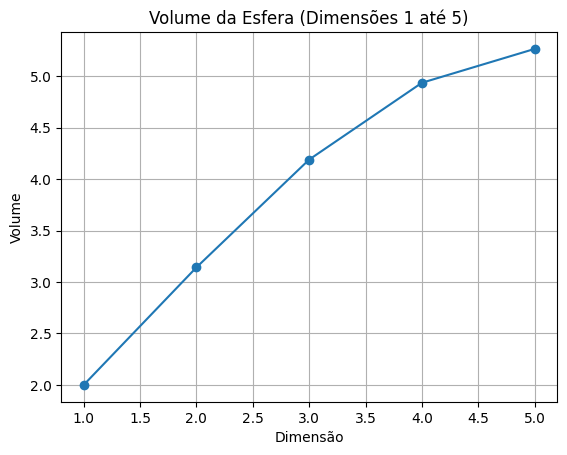

In [3]:
import scipy.special as sp

# Função para calcular o volume de uma esfera
def volume_of_sphere(dim):
    return (np.pi ** (dim / 2)) / sp.gamma(dim / 2 + 1)

# 1. Plotar gráfico para dimensões de 1 até 5
dimensions_small = np.arange(1, 6)
volumes_small = [volume_of_sphere(dim) for dim in dimensions_small]

plt.figure()
plt.plot(dimensions_small, volumes_small, marker='o')
plt.title("Volume da Esfera (Dimensões 1 até 5)")
plt.xlabel("Dimensão")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

### O que acontece quando a dimensão aumenta?

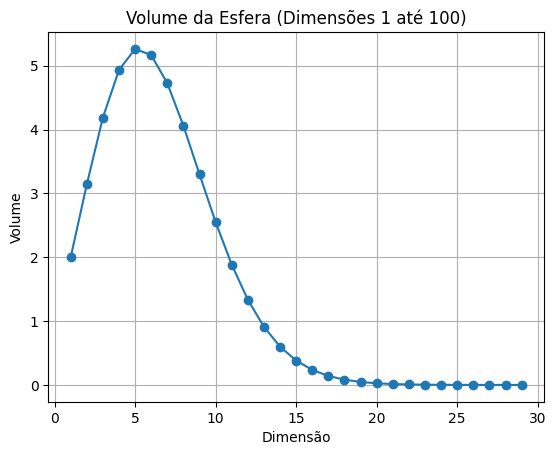

In [4]:
dimensions_large = np.arange(1, 30)
volumes_large = [volume_of_sphere(dim) for dim in dimensions_large]

plt.figure()
plt.plot(dimensions_large, volumes_large, marker='o')
plt.title("Volume da Esfera (Dimensões 1 até 100)")
plt.xlabel("Dimensão")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

### O que aconteceu?

Alguma coisa estranha acontece quando a dimensão aumenta. O que pode ser?

## Regressão Linear

Vamos estudar o que acontece quando aumentamos a complexidade de regressão linear.

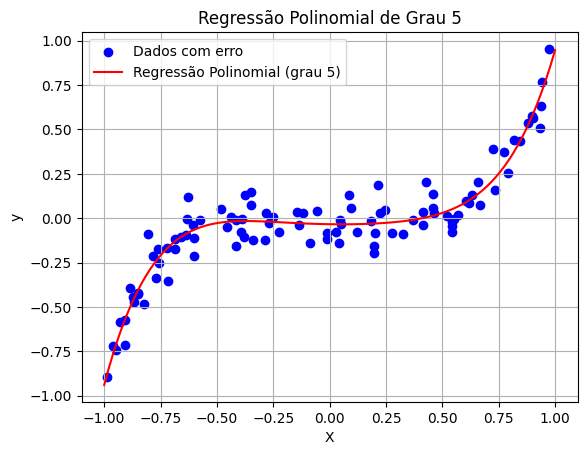

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Gerar os dados
np.random.seed(42)
n_samples = 100
X = np.random.uniform(-1, 1, n_samples)
y = X**5 + np.random.normal(0, 0.1, n_samples)  # y = x^5 + erro

# Preparar os dados para regressão polinomial
X = X[:, np.newaxis]

# Ajustar uma regressão polinomial
degree = 5  # Grau do polinômio
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)

# Gerar predições
X_plot = np.linspace(-1, 1, 100)[:, np.newaxis]
y_plot = poly_model.predict(X_plot)

# Plotar os resultados
plt.scatter(X, y, label="Dados com erro", color="blue")
plt.plot(X_plot, y_plot, label=f"Regressão Polinomial (grau {degree})", color="red")
plt.title(f"Regressão Polinomial de Grau {degree}")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


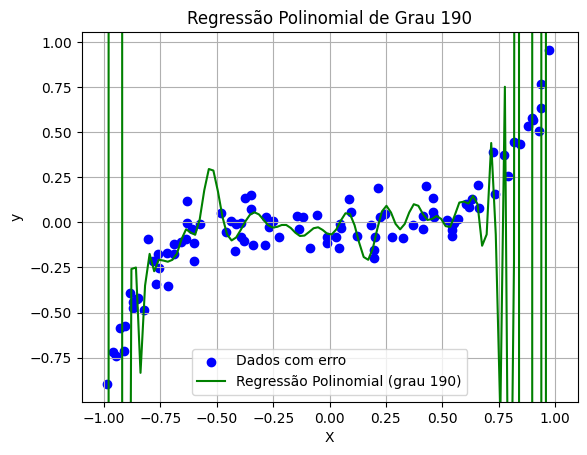

In [6]:
# Ajustar uma regressão polinomial com grau 100
degree_high = 190  # Grau alto para observar overfitting
poly_model_high = make_pipeline(PolynomialFeatures(degree_high), LinearRegression())
poly_model_high.fit(X, y)

# Gerar predições para o grau alto
y_plot_high = poly_model_high.predict(X_plot)

y_min, y_max = y.min(), y.max()

# Plotar os resultados para o modelo de grau 100 com ajuste dos limites de y
plt.scatter(X, y, label="Dados com erro", color="blue")
plt.plot(X_plot, y_plot_high, label=f"Regressão Polinomial (grau {degree_high})", color="green")
plt.ylim([y_min - 0.1, y_max + 0.1])  # Ajustar os limites do eixo y
plt.title(f"Regressão Polinomial de Grau {degree_high}")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


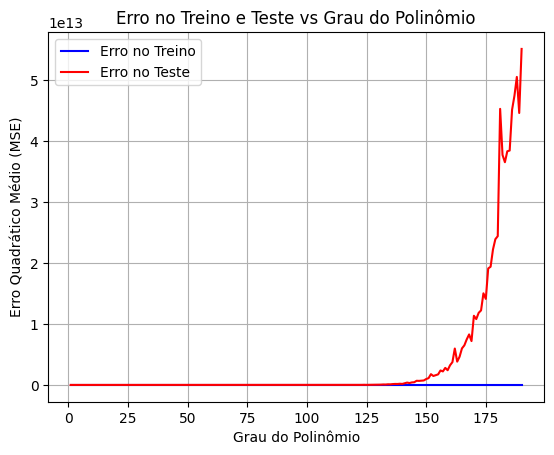

In [7]:
# Preparar para calcular o erro em treino e teste à medida que o grau do polinômio aumenta
from sklearn.metrics import mean_squared_error

max_degree = 190
train_errors = []
test_errors = []

# Separar os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular o erro para cada grau do polinômio
for degree in range(1, max_degree + 1):
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)
    
    # Erro no treino
    y_train_pred = poly_model.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    
    # Erro no teste
    y_test_pred = poly_model.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plotar o erro em treino e teste
plt.figure()
plt.plot(range(1, max_degree + 1), train_errors, label="Erro no Treino", color="blue")
plt.plot(range(1, max_degree + 1), test_errors, label="Erro no Teste", color="red")
plt.xlabel("Grau do Polinômio")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("Erro no Treino e Teste vs Grau do Polinômio")
plt.legend()
plt.grid(True)
plt.show()
